# 📚 머신러닝 실습 1: KNN 알고리즘과 모델링 워크플로우

## 🎯 학습 목표
1. **머신러닝 모델링의 전체 워크플로우** 이해
2. **KNN(K-Nearest Neighbors) 알고리즘**의 원리와 구현
3. **하이퍼파라미터 튜닝** 방법
4. **모델 성능 평가** 및 **비교 분석**

---

## 📋 목차
1. [이론: 머신러닝 워크플로우](#1-이론-머신러닝-워크플로우)
2. [이론: KNN 알고리즘](#2-이론-knn-알고리즘)  
3. [실습: 데이터 준비 및 탐색](#3-실습-데이터-준비-및-탐색)
4. [실습: KNN 모델링](#4-실습-knn-모델링)
5. [실습: 성능 평가 및 최적화](#5-실습-성능-평가-및-최적화)
6. [실습: 다른 알고리즘과 비교](#6-실습-다른-알고리즘과-비교)
7. [결론 및 정리](#7-결론-및-정리)

---

## 1. 이론: 머신러닝 워크플로우

### 🔄 전체 프로세스
```text
데이터 준비 ➜ 데이터 분할 ➜ 모델 선택/학습 ➜ 예측 ➜ 성능 평가
```

### 📊 1단계: 데이터 준비 (80%의 시간 투자 필요)
- **수집**: API, 크롤링, DB, CSV, 센서 등
- **전처리**: 결측치, 이상치, 중복 처리
- **정규화/표준화**: MinMaxScaler, StandardScaler
- **특성 선택**: PCA, SelectKBest, 중요도 기반 선택
- **범주형 처리**: One-Hot Encoding, Label Encoding

### 📈 2단계: 데이터 분할
- **목적**: 과적합 방지, 일반화 성능 확보
- **비율**: Train:Test = 7:3 또는 8:2 권장
- **방법**: `train_test_split()`, K-Fold Cross Validation

### 🤖 3단계: 모델 선택 및 학습
- **분류 알고리즘**: KNN, 로지스틱 회귀, 의사결정트리, 랜덤포레스트, SVM
- **하이퍼파라미터 튜닝**: GridSearchCV, RandomizedSearchCV

### 📏 4단계: 성능 평가
- **분류 지표**: Accuracy, Precision, Recall, F1-Score, ROC-AUC
- **상세 분석**: Confusion Matrix, Classification Report

## 2. 이론: KNN 알고리즘

### 🤖 KNN (K-Nearest Neighbors) 핵심 개념

#### ✅ 작동 원리
> **"내 이웃이 누구인가?"** - 가장 가까운 K개의 이웃의 레이블을 기반으로 예측

1. **거리 계산**: 테스트 데이터와 모든 훈련 데이터 간 거리 측정
2. **이웃 선택**: 가장 가까운 K개의 이웃 찾기
3. **예측 결정**:
   - **분류**: 다수결 투표 (예: K=3, [1,1,0] → class 1)
   - **회귀**: 이웃 값들의 평균

#### ✅ 거리 측정 방식
- **유클리드 거리** (기본): `√Σ(xi - yi)²`
- **맨하탄 거리**: `Σ|xi - yi|`
- **민코프스키 거리**: 일반화된 거리 측정

#### ✅ 주요 하이퍼파라미터

| 파라미터 | 설명 | 권장사항 |
|---------|------|---------|
| `n_neighbors` | 이웃의 수 | 홀수 사용 (동점 방지) |
| `weights` | 가중치 방식 | 'uniform' 또는 'distance' |
| `metric` | 거리 측정 방식 | 'euclidean' (기본) |

#### ✅ 장단점

**장점**:
- 이해하기 쉬운 직관적 알고리즘
- 비선형 패턴 학습 가능
- 별도 학습 과정 불필요 (Lazy Learning)

**단점**:
- 예측 속도 느림 (모든 데이터와 거리 계산)
- 차원의 저주에 민감
- 스케일링 필수 (거리 기반 알고리즘)

#### ✅ 데이터 시각화: 산점도 행렬 (Scatter Matrix)
- **목적**: 모든 특성 간 관계를 한눈에 파악
- **구성**: n개 특성 → n×n 서브플롯 생성
- **활용**: 클래스별 색상 구분으로 분리 가능성 확인


## 3. 실습: 데이터 준비 및 탐색

### 📊 데이터셋: Breast Cancer Wisconsin
- **목적**: 유방암 양성/악성 분류
- **특성**: 30개 연속형 변수 (세포 특성)
- **클래스**: 2개 (malignant=0, benign=1)
- **샘플 수**: 569개


In [1]:
### 🔍 Step 1: 데이터 로드 및 기본 정보 확인

# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우: 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False     # 마이너스(-) 깨짐 방지

# 데이터 로드
data = load_breast_cancer()

print("="*50)
print("📊 Breast Cancer 데이터셋 기본 정보")
print("="*50)
print(f"데이터 키: {list(data.keys())}")
print(f"타겟 클래스: {data.target_names}")
print(f"특성 개수: {len(data.feature_names)}개")
print(f"샘플 개수: {data.data.shape[0]}개")
print("="*50)

📊 Breast Cancer 데이터셋 기본 정보
데이터 키: ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
타겟 클래스: ['malignant' 'benign']
특성 개수: 30개
샘플 개수: 569개


In [2]:
### 📋 Step 2: 데이터셋 상세 설명 확인

print("\n📖 데이터셋 상세 설명:")
print("="*50)
print(data.DESCR)


📖 데이터셋 상세 설명:
.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst 

In [3]:
### 🔢 Step 3: 특성(X)과 타겟(y) 분리

# 특성 행렬과 타겟 벡터 분리
X = data.data   # 특성 데이터 (569 x 30)
y = data.target # 타겟 데이터 (569,)

print("🔍 데이터 구조 확인:")
print(f"X (특성) 형태: {X.shape}")
print(f"y (타겟) 형태: {y.shape}")
print(f"클래스 분포: {np.bincount(y)}")
print(f"클래스 비율: malignant={np.mean(y==0):.2%}, benign={np.mean(y==1):.2%}")

print("\n📊 특성 데이터 샘플 (처음 3개):")
print(X[:3])

print("\n🎯 타겟 데이터 샘플 (처음 20개):")
print(y[:20])


🔍 데이터 구조 확인:
X (특성) 형태: (569, 30)
y (타겟) 형태: (569,)
클래스 분포: [212 357]
클래스 비율: malignant=37.26%, benign=62.74%

📊 특성 데이터 샘플 (처음 3개):
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+0

In [4]:
### ✂️ Step 4: 훈련/테스트 데이터 분할

from sklearn.model_selection import train_test_split 

# 데이터를 랜덤하게 섞어서 훈련/테스트 세트로 분할
# - random_state: 재현 가능한 결과를 위한 시드값
# - test_size: 테스트 데이터의 비율 (20% 권장)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20%를 테스트용으로
    random_state=42,      # 재현성을 위한 시드
    stratify=y           # 클래스 비율 유지
)

print("📊 데이터 분할 결과:")
print(f"훈련셋 크기: {X_train.shape}")
print(f"테스트셋 크기: {X_test.shape}")
print(f"훈련셋 클래스 비율: {np.bincount(y_train)}")
print(f"테스트셋 클래스 비율: {np.bincount(y_test)}")


📊 데이터 분할 결과:
훈련셋 크기: (455, 30)
테스트셋 크기: (114, 30)
훈련셋 클래스 비율: [170 285]
테스트셋 클래스 비율: [42 72]


## 4. 실습: KNN 모델링


### 🚀 기본 KNN 모델 구현

KNN 알고리즘의 핵심은 **"내 이웃이 누구인가?"**를 확인하는 것입니다.


In [5]:
### 🔧 KNN 하이퍼파라미터 튜닝 (n_neighbors 최적화)

from sklearn.neighbors import KNeighborsClassifier

# 최적의 k값을 찾기 위한 하이퍼파라미터 탐색
max_k = 20
train_scores = []
test_scores = []
k_values = range(1, max_k + 1)

print("🔍 KNN 하이퍼파라미터 튜닝 진행중...")

for k in k_values:
    # KNN 모델 생성 및 훈련
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # 훈련셋과 테스트셋 성능 평가
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    print(f"k={k:2d}: Train={train_score:.4f}, Test={test_score:.4f}")

# 최고 성능을 보인 k값 찾기
best_k = k_values[np.argmax(test_scores)]
best_score = max(test_scores)

print(f"\n🎯 최적 k값: {best_k}, 최고 테스트 정확도: {best_score:.4f}")


🔍 KNN 하이퍼파라미터 튜닝 진행중...
k= 1: Train=1.0000, Test=0.9211
k= 2: Train=0.9670, Test=0.9035
k= 3: Train=0.9538, Test=0.9298
k= 4: Train=0.9473, Test=0.9035
k= 5: Train=0.9473, Test=0.9123
k= 6: Train=0.9495, Test=0.9035
k= 7: Train=0.9473, Test=0.9298
k= 8: Train=0.9451, Test=0.9298
k= 9: Train=0.9451, Test=0.9386
k=10: Train=0.9407, Test=0.9298
k=11: Train=0.9407, Test=0.9386
k=12: Train=0.9429, Test=0.9386
k=13: Train=0.9407, Test=0.9474
k=14: Train=0.9407, Test=0.9386
k=15: Train=0.9429, Test=0.9298
k=16: Train=0.9407, Test=0.9298
k=17: Train=0.9363, Test=0.9386
k=18: Train=0.9407, Test=0.9386
k=19: Train=0.9319, Test=0.9386
k=20: Train=0.9385, Test=0.9386

🎯 최적 k값: 13, 최고 테스트 정확도: 0.9474


## 5. 실습: 성능 평가 및 최적화


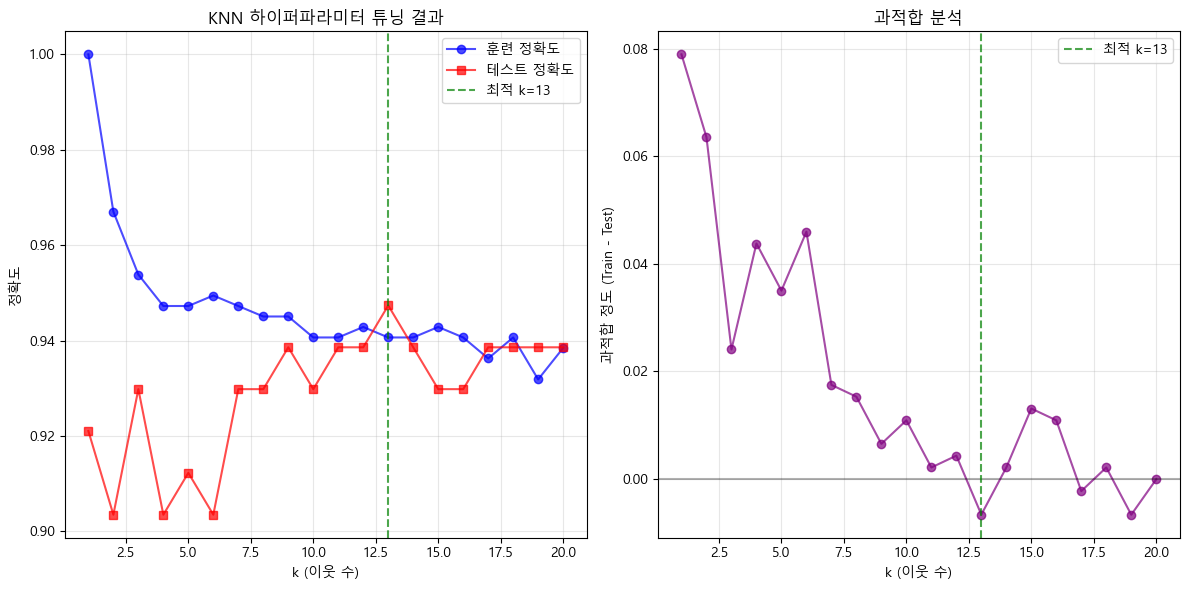

📈 분석 결과:
- 최적 k값: 13
- 최고 테스트 정확도: 0.9474
- k값이 너무 작으면: 과적합 (복잡한 경계)
- k값이 너무 크면: 과소적합 (단순한 경계)


In [6]:
### 📊 성능 시각화 및 분석

# KNN 하이퍼파라미터 튜닝 결과 시각화
plt.figure(figsize=(12, 6))

# 훈련/테스트 성능 곡선
plt.subplot(1, 2, 1)
plt.plot(k_values, train_scores, 'o-', label='훈련 정확도', color='blue', alpha=0.7)
plt.plot(k_values, test_scores, 's-', label='테스트 정확도', color='red', alpha=0.7)
plt.axvline(x=best_k, color='green', linestyle='--', alpha=0.7, label=f'최적 k={best_k}')
plt.xlabel('k (이웃 수)')
plt.ylabel('정확도')
plt.title('KNN 하이퍼파라미터 튜닝 결과')
plt.legend()
plt.grid(True, alpha=0.3)

# 과적합/과소적합 구간 분석
plt.subplot(1, 2, 2)
overfitting = np.array(train_scores) - np.array(test_scores)
plt.plot(k_values, overfitting, 'o-', color='purple', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.axvline(x=best_k, color='green', linestyle='--', alpha=0.7, label=f'최적 k={best_k}')
plt.xlabel('k (이웃 수)')
plt.ylabel('과적합 정도 (Train - Test)')
plt.title('과적합 분석')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📈 분석 결과:")
print(f"- 최적 k값: {best_k}")
print(f"- 최고 테스트 정확도: {best_score:.4f}")
print(f"- k값이 너무 작으면: 과적합 (복잡한 경계)")
print(f"- k값이 너무 크면: 과소적합 (단순한 경계)")


🔍 최적 KNN 모델 상세 성능 평가:
최적 k값: 13
테스트 정확도: 0.9474

📊 분류 보고서:
              precision    recall  f1-score   support

   malignant       0.95      0.90      0.93        42
      benign       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



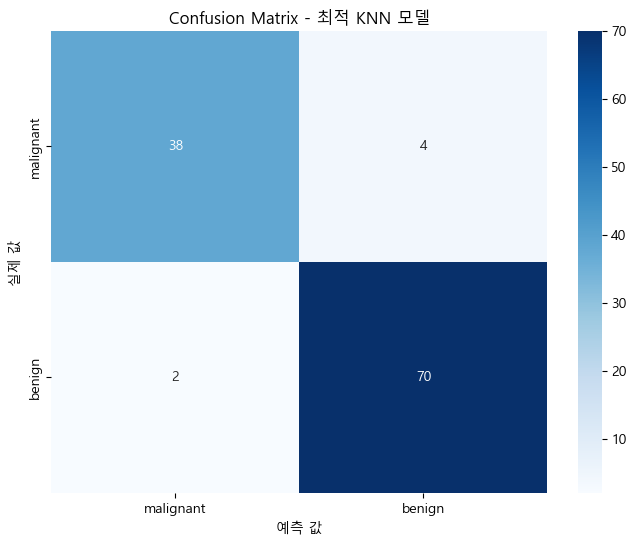

In [7]:
### 🎯 최적 KNN 모델로 상세 성능 평가

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 최적 k값으로 최종 모델 훈련
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)

# 예측 수행
y_pred = final_knn.predict(X_test)

# 성능 평가
print("🔍 최적 KNN 모델 상세 성능 평가:")
print("="*50)
print(f"최적 k값: {best_k}")
print(f"테스트 정확도: {final_knn.score(X_test, y_test):.4f}")
print("\n📊 분류 보고서:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=data.target_names, 
            yticklabels=data.target_names)
plt.title('Confusion Matrix - 최적 KNN 모델')
plt.ylabel('실제 값')
plt.xlabel('예측 값')
plt.show()


In [8]:
## 6. 실습: 다른 알고리즘과 비교

### 🔄 로지스틱 회귀와 성능 비교 (데이터 정규화 포함)

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 데이터 정규화 (거리 기반 알고리즘을 위해 필수)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 정규화된 데이터로 KNN 재훈련
knn_scaled = KNeighborsClassifier(n_neighbors=best_k)
knn_scaled.fit(X_train_scaled, y_train)

# 로지스틱 회귀 모델 훈련
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# 성능 비교
print("🔍 알고리즘 성능 비교:")
print("="*60)
print(f"{'알고리즘':<20} {'훈련 정확도':<12} {'테스트 정확도':<12}")
print("-"*60)
print(f"{'KNN (원본 데이터)':<20} {final_knn.score(X_train, y_train):<12.4f} {final_knn.score(X_test, y_test):<12.4f}")
print(f"{'KNN (정규화)':<20} {knn_scaled.score(X_train_scaled, y_train):<12.4f} {knn_scaled.score(X_test_scaled, y_test):<12.4f}")
print(f"{'로지스틱 회귀':<20} {logistic_model.score(X_train_scaled, y_train):<12.4f} {logistic_model.score(X_test_scaled, y_test):<12.4f}")

print(f"\n💡 인사이트:")
print(f"- 정규화가 KNN 성능에 미친 영향: {knn_scaled.score(X_test_scaled, y_test) - final_knn.score(X_test, y_test):.4f}")
print(f"- 가장 좋은 성능: {'로지스틱 회귀' if logistic_model.score(X_test_scaled, y_test) > knn_scaled.score(X_test_scaled, y_test) else 'KNN'}")
print(f"- 로지스틱 회귀는 선형 결정 경계, KNN은 비선형 결정 경계 가능")

🔍 알고리즘 성능 비교:
알고리즘                 훈련 정확도       테스트 정확도     
------------------------------------------------------------
KNN (원본 데이터)         0.9407       0.9474      
KNN (정규화)            0.9714       0.9737      
로지스틱 회귀              0.9890       0.9825      

💡 인사이트:
- 정규화가 KNN 성능에 미친 영향: 0.0263
- 가장 좋은 성능: 로지스틱 회귀
- 로지스틱 회귀는 선형 결정 경계, KNN은 비선형 결정 경계 가능


## 7. 결론 및 정리

### 📚 학습 내용 요약

이번 실습에서 다음과 같은 핵심 내용을 학습했습니다:

#### ✅ 머신러닝 워크플로우
1. **데이터 준비**: 로드, 탐색, 전처리
2. **데이터 분할**: Train/Test Split with Stratification
3. **모델 선택**: KNN 알고리즘 선택 및 구현
4. **하이퍼파라미터 튜닝**: k값 최적화
5. **성능 평가**: 정확도, Classification Report, Confusion Matrix

#### ✅ KNN 알고리즘 핵심 개념
- **거리 기반 학습**: 가장 가까운 k개 이웃의 다수결 투표
- **Lazy Learning**: 별도 학습 과정 없이 예측 시점에 계산
- **하이퍼파라미터**: k값이 모델 복잡도 결정
- **데이터 정규화의 중요성**: 거리 기반 알고리즘의 필수 전처리

#### ✅ 과적합/과소적합 이해
- **k값이 작을 때**: 과적합 (복잡한 결정 경계)
- **k값이 클 때**: 과소적합 (단순한 결정 경계)
- **최적 k값**: 검증 데이터 성능이 최대가 되는 지점

### 🎯 실무 적용 포인트
1. **데이터 정규화**: 거리 기반 알고리즘에서 필수
2. **하이퍼파라미터 튜닝**: 체계적 접근으로 최적 성능 달성
3. **모델 비교**: 여러 알고리즘 성능 비교를 통한 최적 선택
4. **시각화**: 성능 변화 패턴 이해를 위한 그래프 활용

### 🔍 다음 단계
- 다른 분류 알고리즘 (Random Forest, SVM) 실습
- 교차 검증(Cross Validation) 적용
- 특성 선택 및 차원 축소 기법 학습
- 실제 프로젝트 데이터에 적용


### 📖 참고 자료 및 추가 학습

#### 🔗 Scikit-learn 공식 문서
- [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [Classification metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

#### 📚 추천 학습 자료
- **Hands-On Machine Learning** by Aurélien Géron
- **The Elements of Statistical Learning** by Hastie, Tibshirani, Friedman
- **Pattern Recognition and Machine Learning** by Christopher Bishop

#### 💻 실습 코드 요약
```python
# 기본 워크플로우
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# 1. 데이터 로드 및 분할
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.2, random_state=42, stratify=data.target
)

# 2. 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. 모델 훈련 및 평가
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
accuracy = knn.score(X_test_scaled, y_test)
```